In [1]:
import pandas as pd

df = pd.read_csv('vector_langchain_artemis_filtered_ver2.csv')
df

,emotion,utterance,art_style,langchain,features,vector_features,cluster
0,sadness,The person shown on the above painting seems t...,Romanticism,stress; boredom; dark ; muted tones,"sadness, The person shown on the above paintin...",[-2.62013555e-01 1.31387487e-01 1.10632129e-...,673
1,sadness,The little town is completely wiped out by the...,Post_Impressionism,white; blanket; wiped out,"sadness, The little town is completely wiped o...",[ 5.01293577e-02 1.27774049e-02 3.89084995e-...,1480
2,sadness,He is waiting to take my picture. I rarely am...,Impressionism,rare; avoid,"sadness, He is waiting to take my picture. I ...",[ 5.49288541e-02 1.41162187e-01 2.59286433e-...,717
3,sadness,The people in the back do not look happy that ...,Realism,unhappy faces; displeased crowd,"sadness, The people in the back do not look ha...",[-1.93416879e-01 -1.32229934e-02 5.10782480e-...,753
4,sadness,The lady is looking down in loneliness as she ...,Post_Impressionism,lonely blue; melancholy; desolation,"sadness, The lady is looking down in lonelines...",[-1.30558237e-01 -5.02334610e-02 3.77793968e-...,765
...,...,...,...,...,...,...,...
58181,amusement,The donkey is well painted and illuminated in ...,Realism,bright brown and golden,"amusement, The donkey is well painted and illu...",[-3.30824345e-01 8.03485587e-02 2.31154665e-...,446
58182,amusement,I find the way each of the two horse crane the...,Expressionism,blue; green; vibrant; bright; whimsical,"amusement, I find the way each of the two hors...",[ 6.70550317e-02 2.49198079e-01 3.25733095e-...,305
58183,amusement,The girl walking into the water looks like she...,Baroque,blue waters; raising dress; peek of body,"amusement, The girl walking into the water loo...",[-2.73023695e-01 -3.77145052e-01 3.70694816e-...,977
58184,amusement,it looks like a wooden version of a microphone,Abstract_Expressionism,wooden; microphone,"amusement, it looks like a wooden version of a...",[ 2.59960651e-01 4.22001094e-01 9.30514112e-...,380


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/a2076181/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


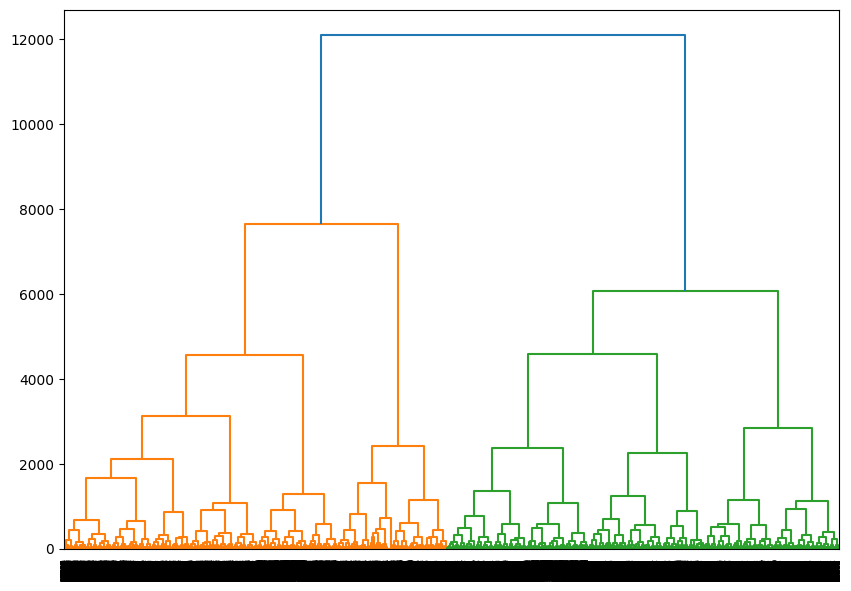

In [2]:
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import ast
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# t-SNE를 사용한 차원 축소
tsne_model = TSNE(n_components=2, random_state=42)

# 문자열을 실수 배열로 변환하는 함수 수정
def string_to_float_array(s):
    # 개행 문자를 공백으로 치환하고, 대괄호 제거
    s_clean = s.replace('\n', ' ').replace('[', '').replace(']', '')
    # 공백으로 분리하고, 각 부분을 실수로 변환하여 NumPy 배열 생성
    return np.array([float(num) for num in s_clean.split()])

# 'vector_features' 컬럼에 저장된 모든 문자열을 숫자 배열로 변환
df['vector_features'] = df['vector_features'].apply(string_to_float_array)

# 이제 벡터 데이터를 NumPy 배열로 쌓을 수 있습니다.
vector_features_array = np.stack(df['vector_features'].values)

# t-SNE를 사용한 차원 축소
tsne_results = tsne_model.fit_transform(vector_features_array)

# 계층적 클러스터링
linked = linkage(tsne_results, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [8]:
from collections import Counter

# 클러스터 할당
df['cluster'] = fcluster(linked, t=4, criterion='distance')

# 클러스터별 자식 노드 개수 계산
cluster_sizes = Counter(df['cluster'])

# 50개 이상의 자식 노드를 가진 클러스터 제외
clusters_to_keep = [cluster for cluster, size in cluster_sizes.items() if size < 50]

# 조건을 만족하는 클러스터만 포함하는 새로운 데이터프레임 생성
filtered_df = df[df['cluster'].isin(clusters_to_keep)]

# 결과 출력
print(f"필터링 후 총 클러스터 개수: {len(set(filtered_df['cluster']))}")
print(f"필터링 후 데이터프레임의 크기: {filtered_df.shape}")

# 필터링된 데이터프레임에서 클러스터별 자식 노드 개수 계산
filtered_cluster_sizes = Counter(filtered_df['cluster'])

# 각 클러스터의 자식 노드 개수 출력
for cluster_id, size in sorted(filtered_cluster_sizes.items()):
    print(f"클러스터 {cluster_id}의 자식 노드 개수: {size}")


필터링 후 총 클러스터 개수: 4828
필터링 후 데이터프레임의 크기: (57913, 7)
클러스터 1의 자식 노드 개수: 13
클러스터 2의 자식 노드 개수: 7
클러스터 3의 자식 노드 개수: 9
클러스터 4의 자식 노드 개수: 11
클러스터 5의 자식 노드 개수: 10
클러스터 6의 자식 노드 개수: 11
클러스터 7의 자식 노드 개수: 11
클러스터 8의 자식 노드 개수: 6
클러스터 9의 자식 노드 개수: 8
클러스터 10의 자식 노드 개수: 6
클러스터 11의 자식 노드 개수: 17
클러스터 12의 자식 노드 개수: 8
클러스터 13의 자식 노드 개수: 10
클러스터 14의 자식 노드 개수: 19
클러스터 15의 자식 노드 개수: 12
클러스터 16의 자식 노드 개수: 7
클러스터 17의 자식 노드 개수: 7
클러스터 18의 자식 노드 개수: 14
클러스터 19의 자식 노드 개수: 12
클러스터 20의 자식 노드 개수: 12
클러스터 21의 자식 노드 개수: 16
클러스터 22의 자식 노드 개수: 7
클러스터 23의 자식 노드 개수: 13
클러스터 24의 자식 노드 개수: 6
클러스터 25의 자식 노드 개수: 8
클러스터 26의 자식 노드 개수: 10
클러스터 27의 자식 노드 개수: 8
클러스터 28의 자식 노드 개수: 6
클러스터 29의 자식 노드 개수: 10
클러스터 30의 자식 노드 개수: 17
클러스터 31의 자식 노드 개수: 17
클러스터 32의 자식 노드 개수: 18
클러스터 33의 자식 노드 개수: 7
클러스터 34의 자식 노드 개수: 20
클러스터 35의 자식 노드 개수: 15
클러스터 36의 자식 노드 개수: 16
클러스터 37의 자식 노드 개수: 22
클러스터 38의 자식 노드 개수: 20
클러스터 39의 자식 노드 개수: 18
클러스터 40의 자식 노드 개수: 8
클러스터 41의 자식 노드 개수: 18
클러스터 42의 자식 노드 개수: 11
클러스터 43의 자식 노드 개수: 21
클러스터 44의 자식 노드 개수: 6
클러스터 4

In [7]:
# from collections import Counter

# # 클러스터 할당
# df['cluster'] = fcluster(linked, t=9, criterion='distance')  # t 값은 덴드로그램을 기반으로 조정

# # 클러스터별 자식 노드 개수 계산
# cluster_sizes = Counter(df['cluster'])

# total_clusters = len(set(df['cluster']))
# print("총 클러스터 개수:", total_clusters)

# # 각 클러스터의 자식 노드 개수 출력
# for cluster_id, size in cluster_sizes.items():
#     print(f"클러스터 {cluster_id}의 자식 노드 개수: {size}")

총 클러스터 개수: 2260
클러스터 754의 자식 노드 개수: 43
클러스터 1658의 자식 노드 개수: 23
클러스터 801의 자식 노드 개수: 37
클러스터 840의 자식 노드 개수: 15
클러스터 853의 자식 노드 개수: 31
클러스터 1620의 자식 노드 개수: 19
클러스터 1274의 자식 노드 개수: 20
클러스터 216의 자식 노드 개수: 17
클러스터 1705의 자식 노드 개수: 20
클러스터 188의 자식 노드 개수: 21
클러스터 1249의 자식 노드 개수: 25
클러스터 2193의 자식 노드 개수: 52
클러스터 1504의 자식 노드 개수: 53
클러스터 831의 자식 노드 개수: 50
클러스터 1712의 자식 노드 개수: 17
클러스터 1740의 자식 노드 개수: 36
클러스터 1623의 자식 노드 개수: 31
클러스터 1594의 자식 노드 개수: 19
클러스터 1805의 자식 노드 개수: 24
클러스터 781의 자식 노드 개수: 34
클러스터 917의 자식 노드 개수: 31
클러스터 1689의 자식 노드 개수: 26
클러스터 759의 자식 노드 개수: 35
클러스터 1581의 자식 노드 개수: 26
클러스터 2235의 자식 노드 개수: 30
클러스터 475의 자식 노드 개수: 21
클러스터 1645의 자식 노드 개수: 30
클러스터 1570의 자식 노드 개수: 22
클러스터 1606의 자식 노드 개수: 18
클러스터 1692의 자식 노드 개수: 30
클러스터 1553의 자식 노드 개수: 25
클러스터 1049의 자식 노드 개수: 22
클러스터 1638의 자식 노드 개수: 28
클러스터 879의 자식 노드 개수: 33
클러스터 1585의 자식 노드 개수: 21
클러스터 1043의 자식 노드 개수: 24
클러스터 882의 자식 노드 개수: 32
클러스터 784의 자식 노드 개수: 40
클러스터 854의 자식 노드 개수: 39
클러스터 799의 자식 노드 개수: 28
클러스터 771의 자식 노드 개수: 48
클러스터 1571의 자식 노드 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

keywordDict = {}

# 클러스터별 중요 키워드 출력
for cluster_id in filtered_df['cluster'].unique():
    print(f"Cluster {cluster_id}에서 가장 중요한 키워드:")
    
    # 해당 클러스터의 텍스트 추출
    cluster_texts = filtered_df[filtered_df['cluster'] == cluster_id]['langchain'].tolist()

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_texts)

    # 각 단어의 TF-IDF 점수 계산
    feature_names = tfidf_vectorizer.get_feature_names_out()
    word_scores = tfidf_matrix.sum(axis=0).A1

    # TF-IDF 점수가 높은 상위 3개의 키워드 추출
    top_keywords_indices = word_scores.argsort()[-3:][::-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_indices]

    keywordDict[cluster_id] = top_keywords

    # 중요 키워드 출력
    for keyword in top_keywords:
        print(keyword)
    print()


Cluster 1608에서 가장 중요한 키워드:
muted
dark
tones

Cluster 3533에서 가장 중요한 키워드:
cold
white
winter

Cluster 1721에서 가장 중요한 키워드:
worn
vibrant
tired

Cluster 1809에서 가장 중요한 키워드:
faces
dark
tired

Cluster 1838에서 가장 중요한 키워드:
loneliness
lonely
melancholy

Cluster 3453에서 가장 중요한 키워드:
trees
lost
dying

Cluster 2730에서 가장 중요한 키워드:
embarrassed
feeling
unwilling

Cluster 463에서 가장 중요한 키워드:
soft
warm
cozy

Cluster 3634에서 가장 중요한 키워드:
flowers
blue
dark

Cluster 397에서 가장 중요한 키워드:
happy
hair
black

Cluster 2682에서 가장 중요한 키워드:
tired
dark
exhausted

Cluster 4678에서 가장 중요한 키워드:
dark
ominous
grim

Cluster 3200에서 가장 중요한 키워드:
gray
rain
clouds

Cluster 1787에서 가장 중요한 키워드:
tears
slumped
pain

Cluster 3649에서 가장 중요한 키워드:
blue
skies
cold

Cluster 3702에서 가장 중요한 키워드:
dark
lack
color

Cluster 3459에서 가장 중요한 키워드:
lonely
abandoned
isolated

Cluster 3396에서 가장 중요한 키워드:
depressing
muddy
gloomy

Cluster 3840에서 가장 중요한 키워드:
chaotic
messy
confusing

Cluster 1676에서 가장 중요한 키워드:
dark
melancholic
somber

Cluster 1607에서 가장 중요한 키워드:
muted
somber


In [17]:
keywordDict

{1608: ['muted', 'dark', 'tones'],
 3533: ['cold', 'white', 'winter'],
 1721: ['worn', 'vibrant', 'tired'],
 1809: ['faces', 'dark', 'tired'],
 1838: ['loneliness', 'lonely', 'melancholy'],
 3453: ['trees', 'lost', 'dying'],
 2730: ['embarrassed', 'feeling', 'unwilling'],
 463: ['soft', 'warm', 'cozy'],
 3634: ['flowers', 'blue', 'dark'],
 397: ['happy', 'hair', 'black'],
 2682: ['tired', 'dark', 'exhausted'],
 4678: ['dark', 'ominous', 'grim'],
 3200: ['gray', 'rain', 'clouds'],
 1787: ['tears', 'slumped', 'pain'],
 3649: ['blue', 'skies', 'cold'],
 3702: ['dark', 'lack', 'color'],
 3459: ['lonely', 'abandoned', 'isolated'],
 3396: ['depressing', 'muddy', 'gloomy'],
 3840: ['chaotic', 'messy', 'confusing'],
 1676: ['dark', 'melancholic', 'somber'],
 1607: ['muted', 'somber', 'tones'],
 1975: ['hopeful', 'characters', 'waiting'],
 3600: ['barren', 'crops', 'dry'],
 1622: ['melancholy', 'blue', 'desolate'],
 3369: ['dark', 'blue', 'loneliness'],
 4767: ['dark', 'blue', 'smoke'],
 1014: 

In [18]:
import json

# 키를 문자열로 변환하는 함수
def convert_keys_to_string(dictionary):
    if isinstance(dictionary, dict):
        return {str(key): convert_keys_to_string(value) for key, value in dictionary.items()}
    return dictionary

# 키를 문자열로 변환한 키워드 사전을 파일에 저장
with open("keyword_dict2.json", "w") as file:
    json.dump(convert_keys_to_string(keywordDict), file)

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

import torch
from transformers import BertTokenizer, BertModel

# BERT 모델과 토크나이저 초기화
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def encode_text(text):
    text = str(text).lower()
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)
    input_ids = torch.tensor([input_ids])
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_states = outputs.last_hidden_state
    return torch.mean(last_hidden_states, dim=1).squeeze().numpy()

def find_close_cluster(prompt):
    prompt_vector = encode_text(prompt)
    
    cluster_centers = filtered_df.groupby('cluster')['vector_features'].apply(lambda vectors: np.mean(np.stack(vectors), axis=0))
    
    distances = []
    for cluster_id, center_vector in cluster_centers.items():
        distance = np.linalg.norm(prompt_vector - center_vector)
        distances.append((cluster_id, distance))
    
    # 가장 가까운 클러스터 찾기
    closest_cluster = min(distances, key=lambda x: x[1])[0]
    return closest_cluster

In [19]:
prompt = "Gray skies and rainy streets give everyone a particularly grim feeling when walking under a black umbrella."
print(find_close_cluster(prompt))

3559


In [20]:
import pandas as pd

maindf = pd.read_csv('../main/data2/T5_T2_v2.csv')
maindf['top3_keywords'] = ""

wordDict = pd.read_json('keyword_dict2.json')

# cluster_df = pd.read_csv('vector_langchain_artemis_filtered_ver2_4.csv')

ValueError: All arrays must be of the same length

In [22]:
for index, row in maindf.iterrows():
    prompt = row['original_text']
    cluster_id = find_close_cluster(prompt)
    
    if cluster_id in keywordDict:
        keywords = ', '.join(keywordDict[cluster_id])  # Convert list of keywords to a single string
        maindf.at[index, 'top3_keywords'] = keywords
    else:
        maindf.at[index, 'top3_keywords'] = ""
    print(index)
    maindf.to_csv('../main/data2/S2_v2.csv', index=False)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
maindf

,emotion,utterance,original_text,keybert,top3_keywords
0,anger,"got job new car suddenly became unimportant, w...",she got a job and a new car then suddenly I be...,job new car,"backflip, public, laughter"
1,anger,"found husband cheating, disgusted sure next, h...",I just found out my husband is cheating on me....,husband cheating disgusted,"drunkenness, drunk, looking"
2,anger,came home dog chewing new furniture set cost f...,So I came home to my dog chewing up my new fur...,dog chewing,"amazing, dude, sandwiches"
3,anger,waiting friend hour go dinner would answer pho...,Once I was waiting for a friend for an hour to...,dinner answer phone,"angry, red, dark"
4,anger,"morning 4 woken neighbor is smoke alarm going,...",The other morning at 4 am I was woken by my ne...,neighbor smoke alarm going,"amazing, dude, sandwiches"
...,...,...,...,...,...
995,fear,"friends invited camping, scared go ; woods afr...","My friends invited me camping, but I was scare...",friends invited camping scared woods,"died, time, long"
996,fear,"year record number tornadoes area, really frea...",This year we have had a record number of torna...,freaks son basement storms,"amazing, dude, sandwiches"
997,fear,"daughters talked going ferris wheel six flags,...",My daughters talked me into going on the ferri...,daughters talked going ferris,"amazing, dude, sandwiches"
998,fear,"disney world, going go tycoon rollar coaster s...","I was at disney world, and I was going to go o...",disney world going tycoon,"amazing, dude, sandwiches"


In [24]:
maindf['utterance'] = maindf['utterance']+', '+maindf['top3_keywords']
maindf

,emotion,utterance,original_text,keybert,top3_keywords
0,anger,"got job new car suddenly became unimportant, w...",she got a job and a new car then suddenly I be...,job new car,"backflip, public, laughter"
1,anger,"found husband cheating, disgusted sure next, h...",I just found out my husband is cheating on me....,husband cheating disgusted,"drunkenness, drunk, looking"
2,anger,came home dog chewing new furniture set cost f...,So I came home to my dog chewing up my new fur...,dog chewing,"amazing, dude, sandwiches"
3,anger,waiting friend hour go dinner would answer pho...,Once I was waiting for a friend for an hour to...,dinner answer phone,"angry, red, dark"
4,anger,"morning 4 woken neighbor is smoke alarm going,...",The other morning at 4 am I was woken by my ne...,neighbor smoke alarm going,"amazing, dude, sandwiches"
...,...,...,...,...,...
995,fear,"friends invited camping, scared go ; woods afr...","My friends invited me camping, but I was scare...",friends invited camping scared woods,"died, time, long"
996,fear,"year record number tornadoes area, really frea...",This year we have had a record number of torna...,freaks son basement storms,"amazing, dude, sandwiches"
997,fear,"daughters talked going ferris wheel six flags,...",My daughters talked me into going on the ferri...,daughters talked going ferris,"amazing, dude, sandwiches"
998,fear,"disney world, going go tycoon rollar coaster s...","I was at disney world, and I was going to go o...",disney world going tycoon,"amazing, dude, sandwiches"


In [25]:
maindf.to_csv('../main/data2/S2_v2.csv', index=False)